In [10]:
# import tensorflow as tf

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
# matplotlib.rcParams['figure.figsize'] = [width, height]
plt.rcParams['figure.figsize'] = [10, 8]


Instructions for updating:
non-resource variables are not supported in the long term


In [11]:
learning_rate = 0.01
training_epochs = 100

x_train = np.linspace(-1, 1, 101)
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33

x_test = tf.placeholder(tf.float32)
y_test = tf.placeholder(tf.float32)


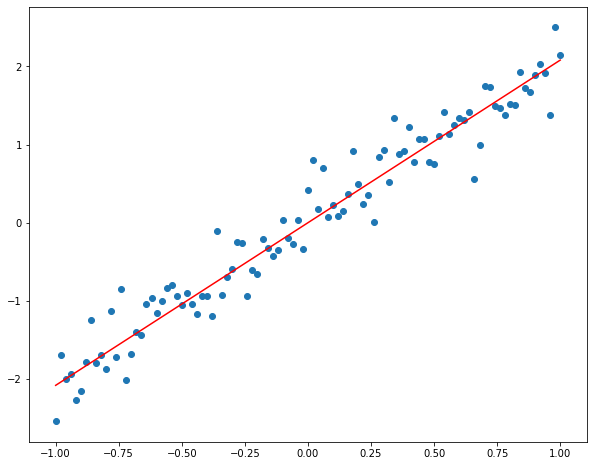

In [14]:
def model(x_test, w):
    return tf.multiply(x_test, w)

w = tf.Variable(0.0, name="weights")

y_model = model(x_test, w)
# cost = tf.square(y_test - y_model)
cost = tf.abs(y_test - y_model)

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epochs):
    for (x, y) in zip(x_train, y_train):
        sess.run(train_op, feed_dict={x_test: x, y_test: y})
        

w_val = sess.run(w)

sess.close()

plt.scatter(x_train, y_train)
y_learned = x_train*w_val

plt.plot(x_train, y_learned, 'r')
plt.show()